In [4]:
!pip install mysql-connector-python


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 1.7 MB/s eta 0:00:10
   -- ------------------------------------- 1.0/16.1 MB 2.1 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/16.1 MB 2.0 MB/s eta 0:00:08
   --- ------------------------------------ 1.6/16.1 MB 1.8 MB/s eta 0:00:09
   ---- ----------------------------------- 1.8/16.1 MB 1.7 MB/s eta 0:00:09
   ----- ---------------------------------- 2.4/16.1 MB 1.7 MB/s eta 0:00:09
   ------ --------------------------------- 2.6/16.1 MB 1.7 MB/s eta 0:00:09
   ------- -------------------------------- 3.1/16.1 MB 1.7 MB/s eta 0:00:08
   -------- ------------------------------- 3.4/16.1 MB 1.7 MB/s eta 0:00:08
   --------- ------------------------------ 3.7/16.1 MB 1.7 MB/s eta 0:00:08
   ---------- ----------------------------- 4.2/16.1 MB 1.7 MB/s eta 0:00:08
   ----------

In [88]:
import mysql.connector
import pandas as pd

In [90]:
# Connecting to MYSQL

connection = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Maaz6229@',
    database = 'newschema'
)

In [92]:
query = "SELECT * FROM superstore; "


In [94]:
df = pd.read_sql(query, connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16628\1848774206.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [96]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [98]:
connection.close()

In [100]:
# Check for the missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [102]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [104]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [106]:
#Convert numerical columns to appropriate types
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [111]:
# Group by Region and sum Sales and Profit
region_sales = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

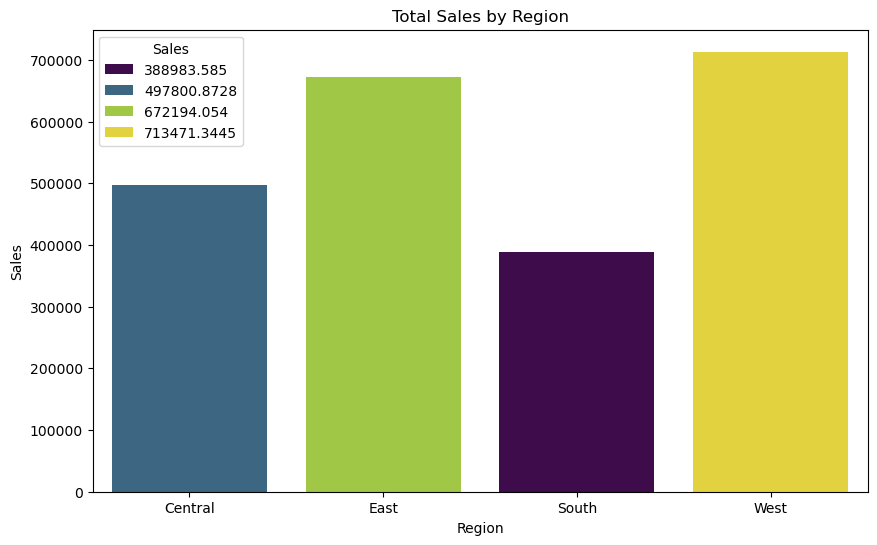

In [113]:
# Plot the total Sales by region 
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Region', y = 'Sales', data = region_sales, palette = 'viridis', hue = 'Sales' )
plt.title('Total Sales by Region')
plt.show()


In [114]:
# Group By Order Date to get monthly sales trend
df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

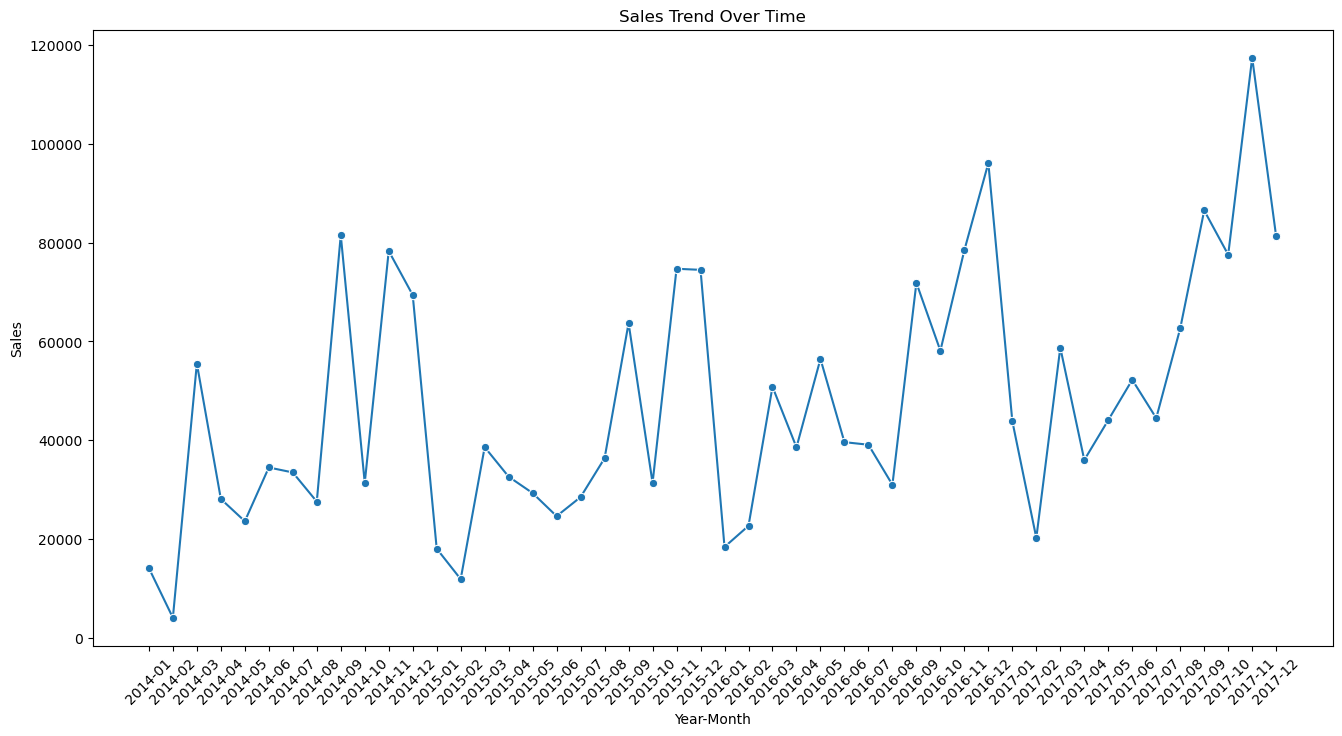

In [117]:
# Plot the monthly sales Trend
plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year-Month', y = 'Sales', data= monthly_sales, marker = 'o')
plt.xticks(rotation = 45)
plt.title('Sales Trend Over Time')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16628\3354298594.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_profit_margin = df.groupby('Category', group_keys=False).apply(


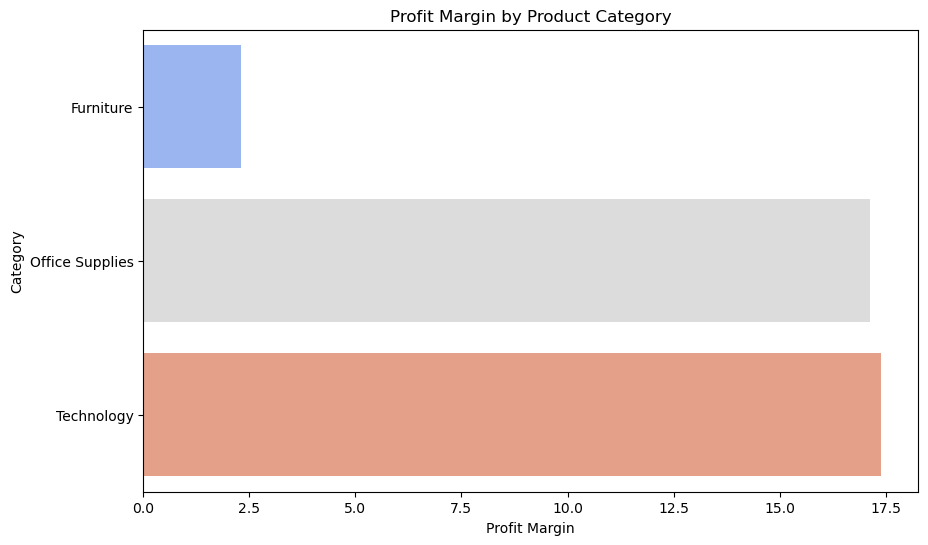

In [119]:
#Group by category and Calculate the Profit margin
# Calculate profit margin for each category
category_profit_margin = df.groupby('Category', group_keys=False).apply(
    lambda x: pd.Series({'Profit Margin': (x['Profit'].sum() / x['Sales'].sum()) * 100})
).reset_index()


#Plot the results with updated Seaborn syntax
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Profit Margin',
    y='Category',
    data=category_profit_margin,
    palette='coolwarm',
    hue='Category',
    dodge=False,
    legend=False
)

plt.title('Profit Margin by Product Category')
plt.show()


In [123]:
#Linear Regression for Sales Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [125]:
df_clean = df.dropna(subset=['Sales', 'Profit', 'Quantity']) #No missing values in Selected Columns

In [127]:
x = df_clean[['Quantity' , 'Discount']] # Predicted variable
y = df_clean['Sales'] # Target variable

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42) #Splitting the data into training and testing

In [131]:
#Train the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [133]:
# Predict sales
y_pred = model.predict(x_test)

In [135]:
y_pred

array([127.11952834, 142.74409225, 243.63506231, ..., 243.63506231,
       259.25962621, 201.00185923])

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
# Mean Absolute Error
mean_absolute_error(y_test, y_pred)

255.7169934668963

In [47]:
# Mean Squared Error
mean_squared_error(y_test,y_pred)

235959.3582224111

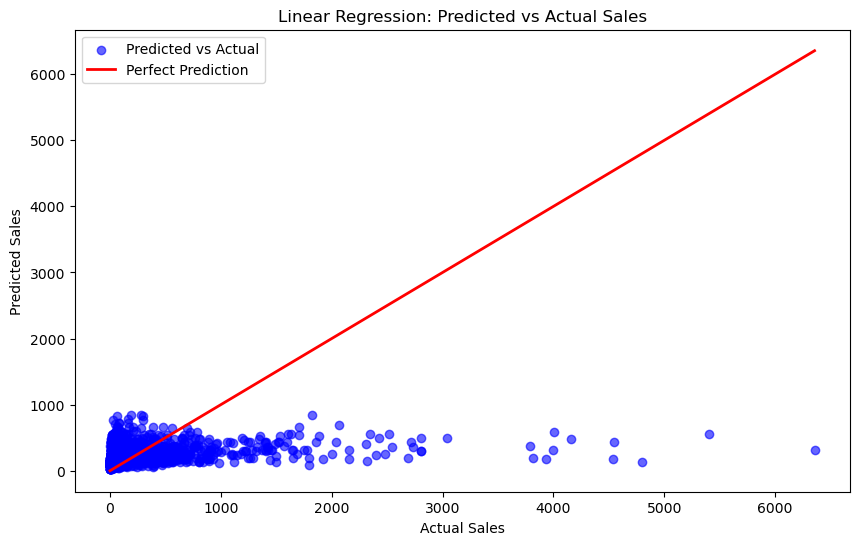

In [59]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression: Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()
